<a href="https://colab.research.google.com/github/gehad-Ahmed30/Time-series-Forecasting/blob/main/Time_series_Forecasting(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL CASE-STUDIES | TIME-SERIES FORECASTING (TSF)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Miles Travelled | Time Series Forecasting  (TSF Case-study)

Dataset Source:
- https://www.kaggle.com/datasets/bulentsiyah/for-simple-exercises-time-series-forecasting

## Importing & Inspecting Data

In [2]:
data = pd.read_csv('/content/miles_traveled.csv')
data.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
data.describe()

,TRFVOLUSM227NFWA
count,588.000000
mean,190420.380952
std,57795.538934
min,77442.000000
25%,133579.000000
50%,196797.500000
75%,243211.500000
max,288145.000000


## Pre-processing Data

In [5]:
data.set_index('DATE', inplace=True)

In [6]:
data.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [7]:
data.index.freq = "MS"

In [8]:
data.rename(columns={'TRFVOLUSM227NFWA' : 'Miles'},inplace=True)


In [9]:
data.head()

,Miles
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


## Exploring Data

<Axes: xlabel='DATE'>

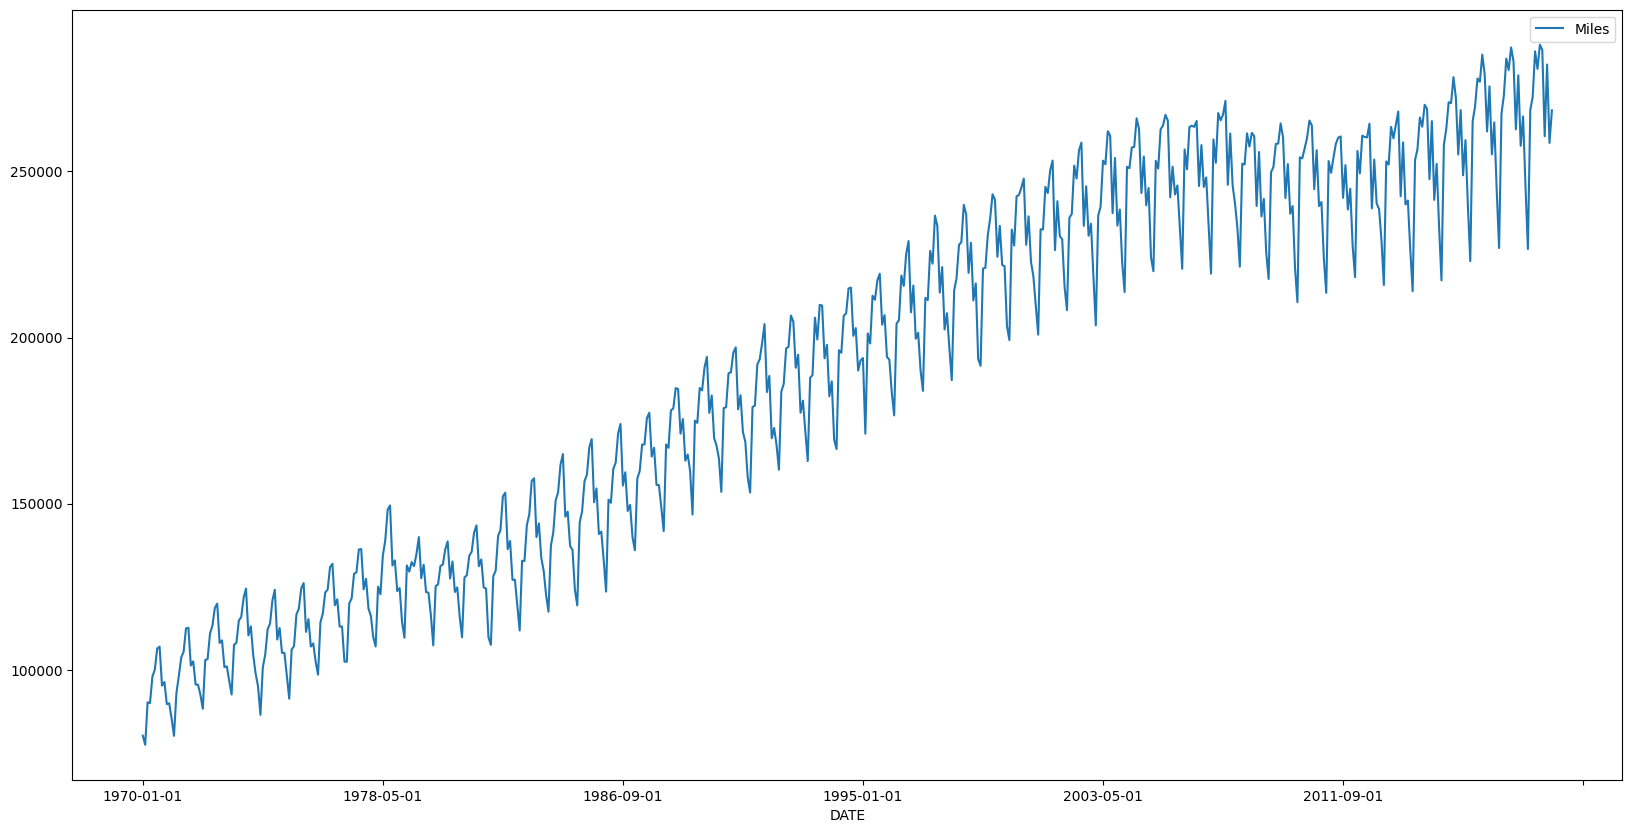

In [10]:
data.plot(figsize=(20,10))

##### Splitting Data

In [11]:
data.shape

(588, 1)

In [12]:
len(data)-12

576

In [13]:
train = data.iloc[:len(data)-12]

In [14]:
train.head()

,Miles
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [15]:
test = data.iloc[len(data)-12:]

In [16]:
test.head()

,Miles
DATE,
2018-01-01,245695.0
2018-02-01,226660.0
2018-03-01,268480.0
2018-04-01,272475.0
2018-05-01,286164.0


##### Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
ms = MinMaxScaler()

In [20]:
df_train = ms.fit_transform(train)
df_train

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821],
       [0.01274887],
       [0.07399679],
       [0.09844641],
       [0.12488268],
       [0.13335334],
       [0.16685961],
       [0.16769811],
       [0.11361547],
       [0.11949919],
       [0.08629306],
       [0.0861025 ],
       [0.07157184],
       [0.05159575],
       [0.12140962],
       [0.12289603],
       [0.15961334],
       [0.17066617],
       [0.19605433],
       [0.20233825],
       [0.14592594],
       [0.14958957],
       [0.11123816],
       [0.11242443],
       [0.09157651],
       [0.07205778],
       [0.1431532 ],
       [0.14615462],
       [0.17806966],
       [0.18302438],
       [0.21078032],
       [0.22383886],
       [0.15669292],
       [0.16982768],
       [0.12834146],
       [0.102

In [21]:
df_test = ms.fit_transform(test)
df_test

array([[0.3095877 ],
       [0.        ],
       [0.68016589],
       [0.74514109],
       [0.96778076],
       [0.88179231],
       [1.        ],
       [0.97500203],
       [0.55192323],
       [0.90288688],
       [0.51931365],
       [0.6790762 ]])

##### Time-series Generator

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
gen = TimeseriesGenerator(df_train, df_train, length=12, batch_size=1)
gen

In [27]:
gen[0]

(array([[[0.0130109 ],
         [0.        ],
         [0.06089061],
         [0.05961858],
         [0.09780801],
         [0.10763646],
         [0.13792216],
         [0.14067108],
         [0.08485905],
         [0.08992334],
         [0.05832273],
         [0.0594042 ]]]),
 array([[0.03760821]]))

In [28]:
df_train[:12]

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ]])

In [29]:
df_train[11:13]

array([[0.0594042 ],
       [0.03760821]])

In [32]:
df_train.shape      #2d

(576, 1)

In [31]:
gen[0][0].shape    #3d array

(1, 12, 1)

## Model Training & Building

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [34]:
model = Sequential(
    [
        LSTM(50, activation='relu', input_shape=(12,1)),
        Dense(1)     #output ---- > not activaction function in reguraction
    ]
)

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='mse')

In [39]:
model.fit_generator(gen, epochs=50)

Epoch 1/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0501
Epoch 2/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0047
Epoch 3/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0033
Epoch 4/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0029
Epoch 5/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0022
Epoch 6/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0023
Epoch 7/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0022
Epoch 8/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0019
Epoch 9/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0019
Epoch 10/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0016
Epoch 11/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0018
Epoch 12/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0015
Epoch 13/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0014
Epoch 14/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0013
Epoch 15/50
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - lo

## Model Evaluation

In [40]:
model.history.history.keys()

dict_keys(['loss'])

In [42]:
model.history.history['loss']

[0.016255419701337814,
 0.004492962267249823,
 0.0037655928172171116,
 0.002639549085870385,
 0.002552964258939028,
 0.0026346815284341574,
 0.0025609503500163555,
 0.002061492530629039,
 0.002056610770523548,
 0.0017008042195811868,
 0.001994165824726224,
 0.0015700673684477806,
 0.0014486723812296987,
 0.0013946574181318283,
 0.001526874490082264,
 0.001281753065995872,
 0.0010814116103574634,
 0.001155102509073913,
 0.0012237204937264323,
 0.000957354495767504,
 0.0008799065835773945,
 0.0008956089150160551,
 0.000994521426036954,
 0.0009105891222134233,
 0.000813719118013978,
 0.0007372944382950664,
 0.0007590765599161386,
 0.0007271060603670776,
 0.0007394507410936058,
 0.0006510953535325825,
 0.0006892133969813585,
 0.000640175596345216,
 0.0005993476370349526,
 0.0007677669636905193,
 0.0007795690908096731,
 0.0006226624245755374,
 0.0005937361274845898,
 0.0006449418724514544,
 0.0006431317888200283,
 0.0005951111088506877,
 0.0006493392866104841,
 0.0005561038269661367,
 0.000

<Axes: >

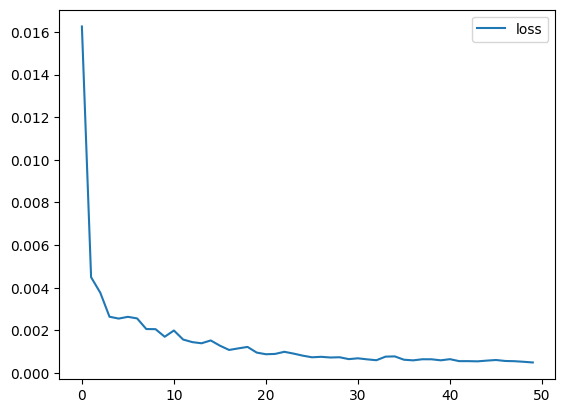

In [43]:
pd.DataFrame(model.history.history).plot()

##### Model Prediction

In [47]:
df_train[-12:]

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [49]:
df_train[-12:].reshape((1,12,1))

array([[[0.79630397],
        [0.71226435],
        [0.90477416],
        [0.93121043],
        [0.98386382],
        [0.96757519],
        [1.        ],
        [0.9801859 ],
        [0.8824684 ],
        [0.95995255],
        [0.85883345],
        [0.90086755]]])

In [50]:
model.predict(df_train[-12:].reshape((1,12,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


array([[0.8009072]], dtype=float32)

In [51]:
ms.inverse_transform(model.predict(df_train[-12:].reshape((1,12,1))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[275903.78]], dtype=float32)

## Model Deployment

In [52]:
model.save('miles_model.h5')